In [ ]:
hours = '0.50	0.75	1.00	1.25	1.50	1.75	1.75	2.00	2.25	2.50	2.75	3.00	3.25	3.50	4.00	4.25	4.50	4.75	5.00	5.50'
passes = '0	0	0	0	0	0	1	0	1	0	1	0	1	0	1	1	1	1	1	1'

In [ ]:
hours = [float(h) for h in hours.split('\t')]
passes = [float(h) for h in passes.split('\t')]

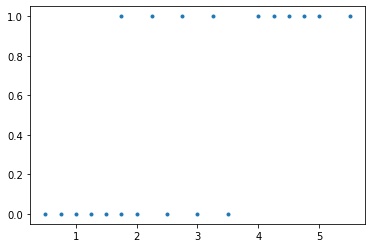

In [ ]:
plt.plot(hours, passes, '.')

In [ ]:
X = np.array(hours)
Y = np.array(passes)

In [ ]:
ones = np.ones(len(X))
X_ = np.vstack((X, ones)).T
R = np.linalg.inv(X_.T @ X_) @ X_.T @ Y
R

array([ 0.23459561, -0.15393527])

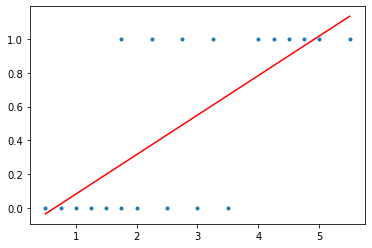

In [ ]:
plt.plot(hours, passes, '.')
plotR(X.min(), X.max(), R)

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

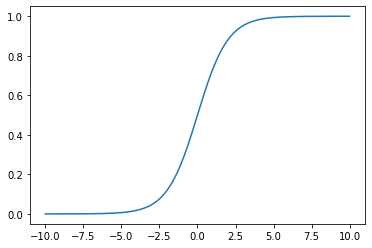

In [ ]:
x = np.linspace(-10, 10, 1000)
y = sigmoid(x)
plt.plot(x, y)

In [ ]:
w = np.random.randn()
b = np.random.randn()

In [ ]:
A = w*X + b

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1.])

In [ ]:
P = sigmoid(A)

In [ ]:
P

array([0.9456266 , 0.93196941, 0.91518954, 0.89473834, 0.87005576,
       0.84061641, 0.84061641, 0.80599466, 0.76594625, 0.72049756,
       0.67002558, 0.61530578, 0.55750452, 0.49810254, 0.38110745,
       0.32662701, 0.27645579, 0.23134343, 0.19164275, 0.12823766])

In [ ]:
def loss(w, b, P):
  L = 0
  for x, y, p in zip(X, Y, P):
    L += y * np.log(p) + (1-y) * np.log(1-p)
  return L

In [ ]:
loss(w, b, P)

-27.610222237963924

In [ ]:
def update(w, b, lr=0.01):
  dw = 0
  db = 0
  for x, y, p in zip(X, Y, P):
    dw += x * (p - y)
    db += (p - y)
  w -= lr * dw
  b -= lr * db
  return w, b

In [ ]:
w, b = update(w, b)

In [ ]:
w, b

(-0.842041263096913, 3.3091571069450603)

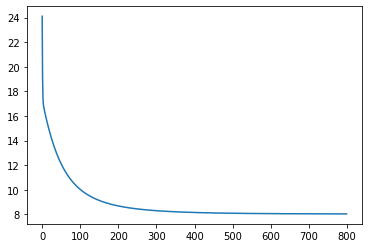

In [ ]:
w = np.random.randn()
b = np.random.randn()
l = []
for epoch in range(800):
  A = w*X + b
  P = sigmoid(A)
  l.append(-loss(w, b, P))
  #print(epoch, l[-1])
  w, b = update(w, b, lr=0.01)
plt.plot(l)

In [ ]:
w, b

(1.4273125928066548, -3.84876008118027)

In [ ]:
A = w*X + b
P = sigmoid(A)

In [ ]:
P

array([0.04168226, 0.05850947, 0.08155177, 0.11258349, 0.15345043,
       0.20571297, 0.20571297, 0.27009613, 0.34585561, 0.43033645,
       0.51907812, 0.60663222, 0.68783259, 0.75893216, 0.86535409,
       0.90179397, 0.92917905, 0.94935656, 0.964008  , 0.98203954])

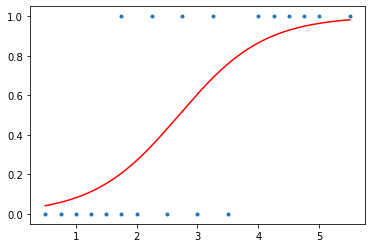

In [ ]:
plt.plot(X, Y, '.')
XX = np.linspace(X.min(), X.max(), 1000)
A = w*XX + b
P = sigmoid(A)
plt.plot(XX, P, 'r')

In [ ]:
import seaborn as sns

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('car_crashes')

In [ ]:
df.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


# Linear Regression

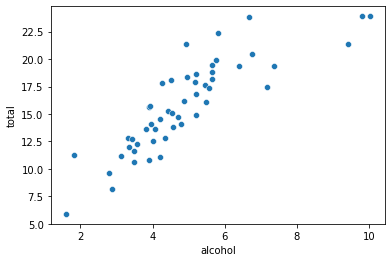

In [ ]:
sns.scatterplot(x='alcohol', y='total', data=df)

In [ ]:
# Vacter
Y = df['total'].values
Y.shape

(51,)

In [ ]:
# Mathic
Y = Y[:, None]
Y.shape

(51, 1)

In [ ]:
X = df['alcohol'].values
X.shape

(51,)

In [ ]:
import numpy as np

In [ ]:
ones = np.ones(len(X))

In [ ]:
ones.shape

(51,)

In [ ]:
X_ = np.vstack((X, ones)).T

In [ ]:
X_.shape

(51, 2)

In [ ]:
R = np.linalg.inv(X_.T @ X_) @ X_.T @ Y

In [ ]:
R

array([[2.0325063 ],
       [5.85777615]])

In [ ]:
def plotR(minX, maxX, R):
  x = np.linspace(minX, maxX, 2)
  ones = np.ones(len(x))
  x = np.vstack((x, ones)).T
  plt.plot(x[:, 0], x @ R, 'r')

In [ ]:
import matplotlib.pyplot as plt

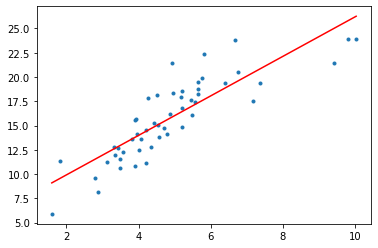

In [ ]:
plt.plot(X, Y, '.')
plotR(X.min(), X.max(), R)

#Non Linear

## Parabola ** 2

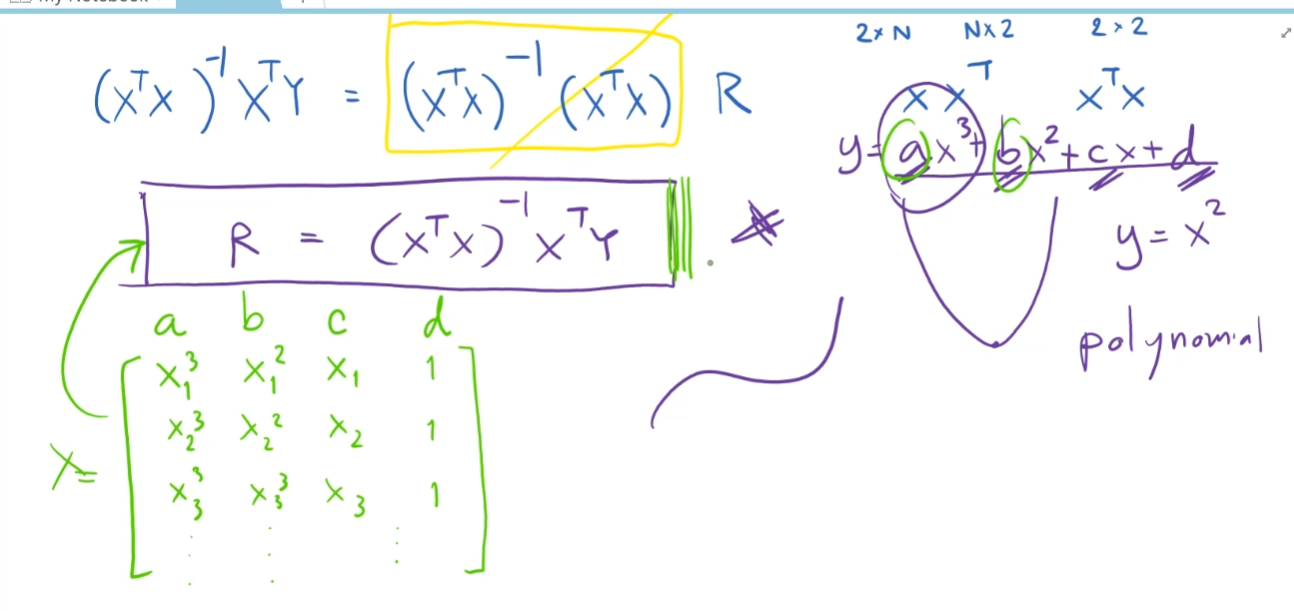

In [ ]:
X_ = np.hstack(((X**2)[:, None], X_))

In [ ]:
R = np.linalg.inv(X_.T @ X_) @ X_.T @ Y

In [ ]:
R

array([[-0.20857159],
       [ 4.46368788],
       [-0.43067562]])

In [ ]:
def plotR2(minX, maxX, R):
  x = np.linspace(minX, maxX, 100)
  ones = np.ones(len(x))
  x = np.vstack((x**2, x, ones)).T
  plt.plot(x[:, 1], x @ R, 'r')

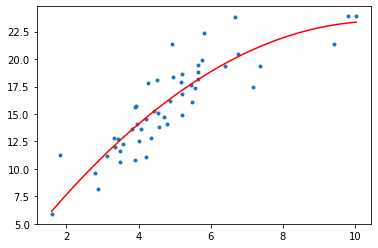

In [ ]:
plt.plot(X, Y, '.')
plotR2(X.min(), X.max(), R)

# Continuous value and Discrete value 

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

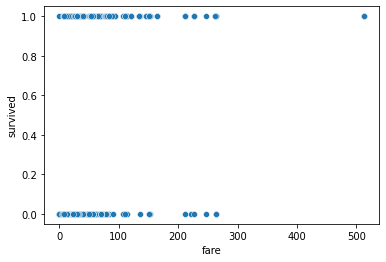

In [ ]:
sns.scatterplot(x='fare', y='survived', data=df)

In [ ]:
hours = '0.50	0.75	1.00	1.25	1.50	1.75	1.75	2.00	2.25	2.50	2.75	3.00	3.25	3.50	4.00	4.25	4.50	4.75	5.00	5.50'
passes = '0	0	0	0	0	0	1	0	1	0	1	0	1	0	1	1	1	1	1	1'

In [ ]:
hours = [float(h) for h in hours.split('\t')]
passes = [float(h) for h in passes.split('\t')]

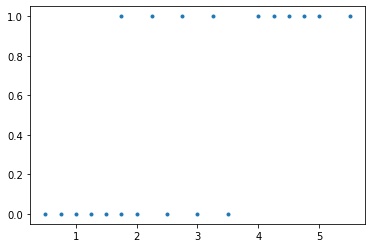

In [ ]:
plt.plot(hours, passes, '.')

In [ ]:
X = np.array(hours)
Y = np.array(passes)

In [ ]:
ones = np.ones(len(X))
X_ = np.vstack((X, ones)).T
R = np.linalg.inv(X_.T @ X_) @ X_.T @ Y
R

array([ 0.23459561, -0.15393527])

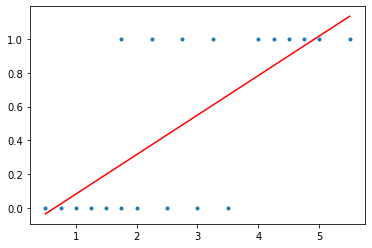

In [ ]:
plt.plot(hours, passes, '.')
plotR(X.min(), X.max(), R)

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

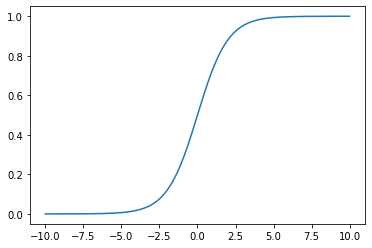

In [ ]:
x = np.linspace(-10, 10, 1000)
y = sigmoid(x)
plt.plot(x, y)

In [ ]:
w = np.random.randn()
b = np.random.randn()

In [ ]:
A = w*X + b

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1.])

In [ ]:
P = sigmoid(A)

In [ ]:
P

array([0.9456266 , 0.93196941, 0.91518954, 0.89473834, 0.87005576,
       0.84061641, 0.84061641, 0.80599466, 0.76594625, 0.72049756,
       0.67002558, 0.61530578, 0.55750452, 0.49810254, 0.38110745,
       0.32662701, 0.27645579, 0.23134343, 0.19164275, 0.12823766])

In [ ]:
def loss(P):
  L = 0
  for y, p in zip(Y, P):
    L += y * np.log(p + np.finfo(float).eps) + (1-y) * np.log(1-p + np.finfo(float).eps)
  return L

In [ ]:
loss(w, b, P)

-27.610222237963924

In [ ]:
def update(w, b, lr=0.01):
  dw = 0
  db = 0
  for x, y, p in zip(X, Y, P):
    dw += x * (p - y)
    db += (p - y)
  w -= lr * dw
  b -= lr * db
  return w, b

In [ ]:
w, b = update(w, b)

In [ ]:
w, b

(-0.842041263096913, 3.3091571069450603)

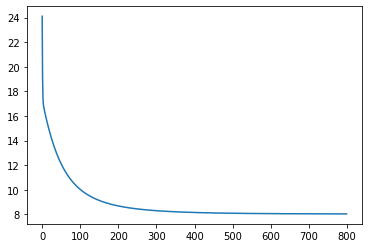

In [ ]:
w = np.random.randn()
b = np.random.randn()
l = []
for epoch in range(800):
  A = w*X + b
  P = sigmoid(A)
  l.append(-loss(w, b, P))
  #print(epoch, l[-1])
  w, b = update(w, b, lr=0.01)
plt.plot(l)

In [ ]:
w, b

(1.4273125928066548, -3.84876008118027)

In [ ]:
A = w*X + b
P = sigmoid(A)

In [ ]:
P

array([0.04168226, 0.05850947, 0.08155177, 0.11258349, 0.15345043,
       0.20571297, 0.20571297, 0.27009613, 0.34585561, 0.43033645,
       0.51907812, 0.60663222, 0.68783259, 0.75893216, 0.86535409,
       0.90179397, 0.92917905, 0.94935656, 0.964008  , 0.98203954])

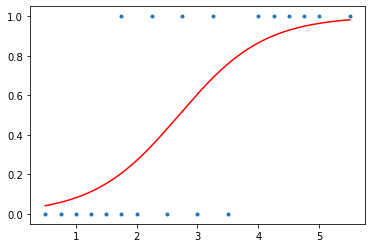

In [ ]:
plt.plot(X, Y, '.')
XX = np.linspace(X.min(), X.max(), 1000)
A = w*XX + b
P = sigmoid(A)
plt.plot(XX, P, 'r')

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df = df.dropna()

In [ ]:
X = df[['age', 'fare']].values
Y = df['survived'].values

In [ ]:
w

array([ 39.57910673, 102.50699977])

In [ ]:
def update2(w, b, lr=0.01):
  dw1 = 0
  dw2 = 0
  db = 0
  for x, y, p in zip(X, Y, P):
    dw1 += x[0] * (p - y)
    dw2 += x[1] * (p - y)
    db += (p - y)
  w[0] = w[0] - lr * dw1
  w[1] = w[1] - lr * dw2
  b -= lr * db
  return w, b

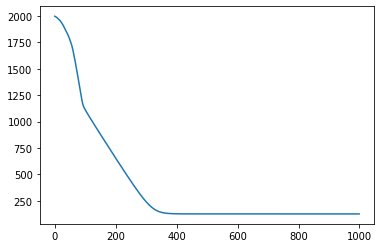

In [ ]:
w = np.random.randn(2) # age, fare
b = np.random.randn()

l = []
for epoch in range(1000):
  P = sigmoid(np.sum(X * w, axis=1)  + b)
  #print(P)
  l.append(-loss(P))
  #print(epoch, l[-1])
  w, b = update2(w, b, lr=0.000001)
plt.plot(l)

In [ ]:
w,b 

(array([0.0190981 , 0.01318271]), -1.172190060366437)

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
itrain = np.r_[:25, 50:75, 100:125]
itest = np.r_[25:50, 75:100, 125:150]

In [ ]:
X = df.iloc[:, :4].values

In [ ]:
Y = df.iloc[:, -1].values

In [ ]:
Xtrain = X[itrain]
Xtest = X[itest]
Ytrain = Y[itrain]
Ytest = Y[itest]

In [ ]:
def NN(x):
  return Ytrain[np.sum((Xtrain - x) ** 2, axis=1).argmin()]

In [ ]:
z = []
for x in Xtest:
  z.append(NN(x))
z = np.array(z)

In [ ]:
np.sum(z == Ytest) / len(z) * 100

94.66666666666667